# GO analysis & Figures in R with EnrichR

In [1]:
library("tidyverse")
library(enrichR)
library(GOplot)
library(openxlsx)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

Loading required package: ggdendro

Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: RColorBrewer



In [2]:
DEPs <- read.table("./GO_EnrichRinR_ExampleDataSets.tsv", header = T)
head(DEPs,2)

,Accession,log2FC
,<chr>,<dbl>
1,Sptan1,-0.2919604
2,Ank2,-0.2680982


In [3]:
GOlist <- DEPs
colnames(GOlist) <- c("ID","logFC")
head(GOlist,2)


,ID,logFC
,<chr>,<dbl>
1,Sptan1,-0.2919604
2,Ank2,-0.2680982


# GO database connection & select Database

In [4]:
setEnrichrSite("Enrichr") # for Human genes
DBlist <- listEnrichrDbs()
head(DBlist,6)
DBlist$libraryName   #Find Database list!! 

GOdb <- c("GO_Biological_Process_2021", "GO_Cellular_Component_2021", "GO_Molecular_Function_2021","KEGG_2021_Human")



Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


[1] "Genome_Browser_PWMs"                               
  [2] "TRANSFAC_and_JASPAR_PWMs"                          
  [3] "Transcription_Factor_PPIs"                         
  [4] "ChEA_2013"                                         
  [5] "Drug_Perturbations_from_GEO_2014"                  
  [6] "ENCODE_TF_ChIP-seq_2014"                           
  [7] "BioCarta_2013"                                     
  [8] "Reactome_2013"                                     
  [9] "WikiPathways_2013"                                 
 [10] "Disease_Signatures_from_GEO_up_2014"               
 [11] "KEGG_2013"                                         
 [12] "TF-LOF_Expression_from_GEO"                        
 [13] "TargetScan_microRNA"                               
 [14] "PPI_Hub_Proteins"                                  
 [15] "GO_Molecular_Function_2015"                        
 [16] "GeneSigDB"                                         
 [17] "Chromosome_Location"                               
 [18] "Human_Gene_Atlas"                                  
 [19] "Mouse_Gene_Atlas"                                  
 [20] "GO_Cellular_Component_2015"                        
 [21] "GO_Biological_Process_2015"                        
 [22] "Human_Phenotype_Ontology"                          
 [23] "Epigenomics_Roadmap_HM_ChIP-seq"                   
 [24] "KEA_2013"                                          
 [25] "NURSA_Human_Endogenous_Complexome"                 
 [26] "CORUM"                                             
 [27] "SILAC_Phosphoproteomics"                           
 [28] "MGI_Mammalian_Phenotype_Level_3"                   
 [29] "MGI_Mammalian_Phenotype_Level_4"                   
 [30] "Old_CMAP_up"                                       
 [31] "Old_CMAP_down"                                     
 [32] "OMIM_Disease"                                      
 [33] "OMIM_Expanded"                                     
 [34] "VirusMINT"                                         
 [35] "MSigDB_Computational"                              
 [36] "MSigDB_Oncogenic_Signatures"                       
 [37] "Disease_Signatures_from_GEO_down_2014"             
 [38] "Virus_Perturbations_from_GEO_up"                   
 [39] "Virus_Perturbations_from_GEO_down"                 
 [40] "Cancer_Cell_Line_Encyclopedia"                     
 [41] "NCI-60_Cancer_Cell_Lines"                          
 [42] "Tissue_Protein_Expression_from_ProteomicsDB"       
 [43] "Tissue_Protein_Expression_from_Human_Proteome_Map" 
 [44] "HMDB_Metabolites"                                  
 [45] "Pfam_InterPro_Domains"                             
 [46] "GO_Biological_Process_2013"                        
 [47] "GO_Cellular_Component_2013"                        
 [48] "GO_Molecular_Function_2013"                        
 [49] "Allen_Brain_Atlas_up"                              
 [50] "ENCODE_TF_ChIP-seq_2015"                           
 [51] "ENCODE_Histone_Modifications_2015"                 
 [52] "Phosphatase_Substrates_from_DEPOD"                 
 [53] "Allen_Brain_Atlas_down"                            
 [54] "ENCODE_Histone_Modifications_2013"                 
 [55] "Achilles_fitness_increase"                         
 [56] "Achilles_fitness_decrease"                         
 [57] "MGI_Mammalian_Phenotype_2013"                      
 [58] "BioCarta_2015"                                     
 [59] "HumanCyc_2015"                                     
 [60] "KEGG_2015"                                         
 [61] "NCI-Nature_2015"                                   
 [62] "Panther_2015"                                      
 [63] "WikiPathways_2015"                                 
 [64] "Reactome_2015"                                     
 [65] "ESCAPE"                                            
 [66] "HomoloGene"                                        
 [67] "Disease_Perturbations_from_GEO_down"               
 [68] "Disease_Perturbations_from_GEO_up"        

In [5]:
# GO db list
GOdb

GO.results <- enrichr(GOlist$ID,GOdb)

GO.results

[1] "GO_Biological_Process_2021" "GO_Cellular_Component_2021"
[3] "GO_Molecular_Function_2021" "KEGG_2021_Human"

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying KEGG_2021_Human... Done.
Parsing results... Done.


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
mRNA processing (GO:0006397),36/300,4.296192e-18,9.004819e-15,0,0,7.305087,292.12168,TCERG1;RAMAC;RBM8A;DDX46;PRCC;HNRNPU;SNU13;PNN;SYNCRIP;UBL5;HNRNPA1;SMNDC1;CTNNBL1;SRRM2;SF3A3;SF3A1;SF3A2;GTF2H1;CWC15;PLRG1;MAGOHB;GTF2F1;WBP11;SUPT5H;GTF2F2;LSM4;LSM3;SRRM1;LSM7;HNRNPK;LSM6;SARNP;PRPF3;NOVA2;PRPF31;SF1
"RNA splicing, via transesterification reactions with bulged adenosine as nucleophile (GO:0000377)",31/251,4.330063e-16,4.537906e-13,0,0,7.462407,263.98846,RBM8A;DDX46;PRCC;HNRNPU;SNU13;PNN;SYNCRIP;UBL5;HNRNPA1;SMNDC1;CTNNBL1;SRRM2;SF3A3;SF3A1;SF3A2;CWC15;PLRG1;MAGOHB;GTF2F1;WBP11;GTF2F2;LSM4;LSM3;SRRM1;LSM7;HNRNPK;LSM6;PRPF3;NOVA2;PRPF31;SF1
"mRNA splicing, via spliceosome (GO:0000398)",32/274,7.318213e-16,5.112991e-13,0,0,7.014061,244.44700,RBM8A;DDX46;PRCC;HNRNPU;SNU13;PNN;SYNCRIP;UBL5;HNRNPA1;DCPS;SMNDC1;CTNNBL1;SRRM2;SF3A3;SF3A1;SF3A2;CWC15;PLRG1;MAGOHB;GTF2F1;WBP11;GTF2F2;LSM4;LSM3;SRRM1;LSM7;HNRNPK;LSM6;PRPF3;NOVA2;PRPF31;SF1
gene expression (GO:0010467),25/356,5.391488e-08,2.825140e-05,0,0,3.912874,65.48531,RBM8A;HNRNPU;RRBP1;RPL10A;MRPL35;RBM3;SYNCRIP;RPL14;TSPAN5;EIF4EBP2;RPL38;RAE1;RPSA;MAGOHB;SRRM1;RPS28;HNRNPK;RPS29;SARNP;NUP50;RPS20;RPL29;RPS21;PTMA;NUP58
transcription elongation from RNA polymerase II promoter (GO:0006368),11/67,7.787461e-08,3.264504e-05,0,0,9.947123,162.81615,CDK9;ELOA;GTF2H1;GTF2F1;MLLT3;SUPT5H;AFF4;GTF2F2;CDC73;IWS1;NELFE
"DNA-templated transcription, elongation (GO:0006354)",11/69,1.066643e-07,3.726141e-05,0,0,9.603136,154.16470,CDK9;ELOA;GTF2H1;GTF2F1;MLLT3;SUPT5H;AFF4;GTF2F2;CDC73;IWS1;NELFE
nuclear-transcribed mRNA catabolic process (GO:0000956),16/171,3.235663e-07,9.688500e-05,0,0,5.269122,78.74103,RBM8A;PYM1;RPSA;RPL10A;MAGOHB;RPS28;EXOSC10;RPS29;THRAP3;EXOSC9;RPL14;RPL38;RPS20;RPL29;RPS21;DCPS
RNA processing (GO:0006396),16/179,6.019097e-07,1.577003e-04,0,0,5.008454,71.73688,SF3A3;TCERG1;SF3A1;SF3A2;RBM8A;HNRNPU;MAGOHB;LSM4;LSM3;SRRM1;RBM3;SYNCRIP;HNRNPK;LSM6;PRPF3;PPIG
ribosome biogenesis (GO:0042254),16/192,1.534147e-06,3.572858e-04,0,0,4.635409,62.05671,NOP14;NPM1;PAK1IP1;RRP1;NOLC1;SNU13;RPL10A;RPS28;EXOSC10;EXOSC9;RPL14;ESF1;RPL38;RPL29;GLUL;NOP53


# GO result data processing in R

In [6]:
GO.results$GO_Biological_Process_2021$Category <- "BP"
GO.results$GO_Cellular_Component_2021$Category <- "CC"
GO.results$GO_Molecular_Function_2021$Category <- "MF"

GO.all <- rbind(GO.results$GO_Biological_Process_2021,GO.results$GO_Cellular_Component_2021,GO.results$GO_Molecular_Function_2021)
head(GO.all,2)

KEGG <- GO.results$KEGG_2021_Human
KEGG$Category <- "KEGG"
head(KEGG,2)


# Separateion GO ID and Term

GOID.list <- GO.all$Term %>% str_split("\\(GO")
terms <- GOID.list %>% sapply(`[`,1)
termIDs <- GOID.list %>% sapply(`[`,2)
termIDs <- gsub("\\)","",termIDs)
termIDs <- paste0("GO:",termIDs)

GO.all$Term <- terms
GO.all$ID <- termIDs

KEGG$ID <- KEGG$Category

head(GO.all,2)
head(KEGG,2)

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,Category
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,mRNA processing (GO:0006397),36/300,4.296192e-18,9.004819e-15,0,0,7.305087,292.1217,TCERG1;RAMAC;RBM8A;DDX46;PRCC;HNRNPU;SNU13;PNN;SYNCRIP;UBL5;HNRNPA1;SMNDC1;CTNNBL1;SRRM2;SF3A3;SF3A1;SF3A2;GTF2H1;CWC15;PLRG1;MAGOHB;GTF2F1;WBP11;SUPT5H;GTF2F2;LSM4;LSM3;SRRM1;LSM7;HNRNPK;LSM6;SARNP;PRPF3;NOVA2;PRPF31;SF1,BP
2,"RNA splicing, via transesterification reactions with bulged adenosine as nucleophile (GO:0000377)",31/251,4.330063e-16,4.537906e-13,0,0,7.462407,263.9885,RBM8A;DDX46;PRCC;HNRNPU;SNU13;PNN;SYNCRIP;UBL5;HNRNPA1;SMNDC1;CTNNBL1;SRRM2;SF3A3;SF3A1;SF3A2;CWC15;PLRG1;MAGOHB;GTF2F1;WBP11;GTF2F2;LSM4;LSM3;SRRM1;LSM7;HNRNPK;LSM6;PRPF3;NOVA2;PRPF31;SF1,BP


,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,Category
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,Spliceosome,24/150,2.767705e-15,5.507732e-13,0,0,9.946125,333.40166,SF3A3;TCERG1;RBM25;SF3A1;SF3A2;RBM8A;DDX46;HNRNPU;SNU13;CWC15;PLRG1;WBP11;MAGOHB;LSM4;LSM3;LSM7;HNRNPK;LSM6;PRPF3;ACIN1;PRPF31;HNRNPA1;SMNDC1;CTNNBL1,KEGG
2,Coronavirus disease,14/232,2.361339e-04,2.162614e-02,0,0,3.250413,27.14456,ACE;FGG;F13A1;RPSA;RPL10A;RPS28;STING1;RPS29;RPL14;RPL38;RPS20;FAU;RPL29;RPS21,KEGG


,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,Category,ID
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,mRNA processing,36/300,4.296192e-18,9.004819e-15,0,0,7.305087,292.1217,TCERG1;RAMAC;RBM8A;DDX46;PRCC;HNRNPU;SNU13;PNN;SYNCRIP;UBL5;HNRNPA1;SMNDC1;CTNNBL1;SRRM2;SF3A3;SF3A1;SF3A2;GTF2H1;CWC15;PLRG1;MAGOHB;GTF2F1;WBP11;SUPT5H;GTF2F2;LSM4;LSM3;SRRM1;LSM7;HNRNPK;LSM6;SARNP;PRPF3;NOVA2;PRPF31;SF1,BP,GO::0006397
2,"RNA splicing, via transesterification reactions with bulged adenosine as nucleophile",31/251,4.330063e-16,4.537906e-13,0,0,7.462407,263.9885,RBM8A;DDX46;PRCC;HNRNPU;SNU13;PNN;SYNCRIP;UBL5;HNRNPA1;SMNDC1;CTNNBL1;SRRM2;SF3A3;SF3A1;SF3A2;CWC15;PLRG1;MAGOHB;GTF2F1;WBP11;GTF2F2;LSM4;LSM3;SRRM1;LSM7;HNRNPK;LSM6;PRPF3;NOVA2;PRPF31;SF1,BP,GO::0000377


,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,Category,ID
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Spliceosome,24/150,2.767705e-15,5.507732e-13,0,0,9.946125,333.40166,SF3A3;TCERG1;RBM25;SF3A1;SF3A2;RBM8A;DDX46;HNRNPU;SNU13;CWC15;PLRG1;WBP11;MAGOHB;LSM4;LSM3;LSM7;HNRNPK;LSM6;PRPF3;ACIN1;PRPF31;HNRNPA1;SMNDC1;CTNNBL1,KEGG,KEGG
2,Coronavirus disease,14/232,2.361339e-04,2.162614e-02,0,0,3.250413,27.14456,ACE;FGG;F13A1;RPSA;RPL10A;RPS28;STING1;RPS29;RPL14;RPL38;RPS20;FAU;RPL29;RPS21,KEGG,KEGG


In [7]:
#GO data parsing for GOplot data visualziation

GO.all.parse <- GO.all %>% 
        subset(select=c("Category","ID","Term","Adjusted.P.value","Genes"))
colnames(GO.all.parse) <- c("Category","ID","Term","adj_pval","Genes")
GO.all.parse$Genes<- gsub(";",",",GO.all.parse$Genes)
sig.GO.all.parse <- GO.all.parse %>% filter(adj_pval < 0.05)


# KEGG data parsing for Z score calculation

KEGG.parse <- KEGG %>% subset(select=c("Category","ID","Term","Adjusted.P.value","Genes"))
colnames(KEGG.parse) <- c("Category","ID","Term","adj_pval","Genes")
KEGG.parse$Genes<- gsub(";",",",KEGG.parse$Genes)
sig.KEGG.parse <- KEGG.parse %>% filter(adj_pval < 0.05)



## Why Z-score in GO data?
---
#### GOplot package
[GOplot link](https://wencke.github.io)  

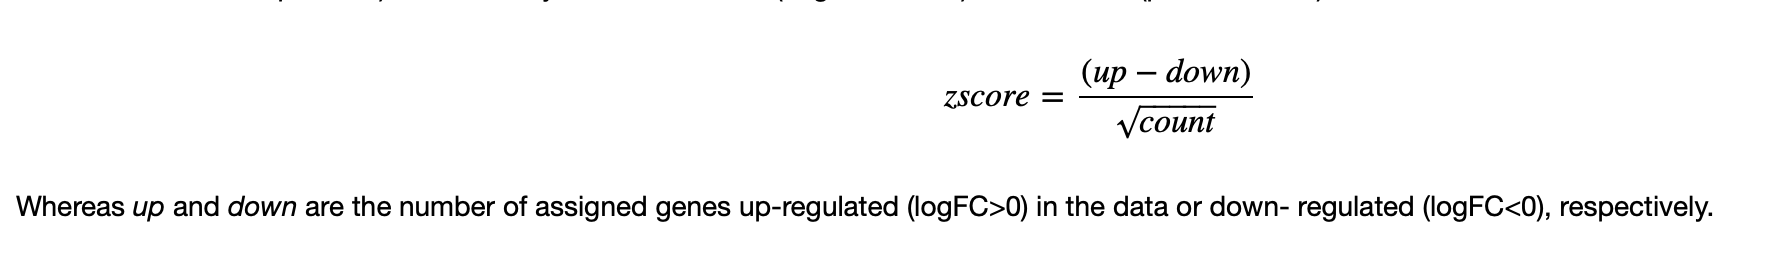


In [8]:
circ <- circle_dat(sig.GO.all.parse,GOlist)

KEGG.circ <- circle_dat(sig.KEGG.parse,GOlist)

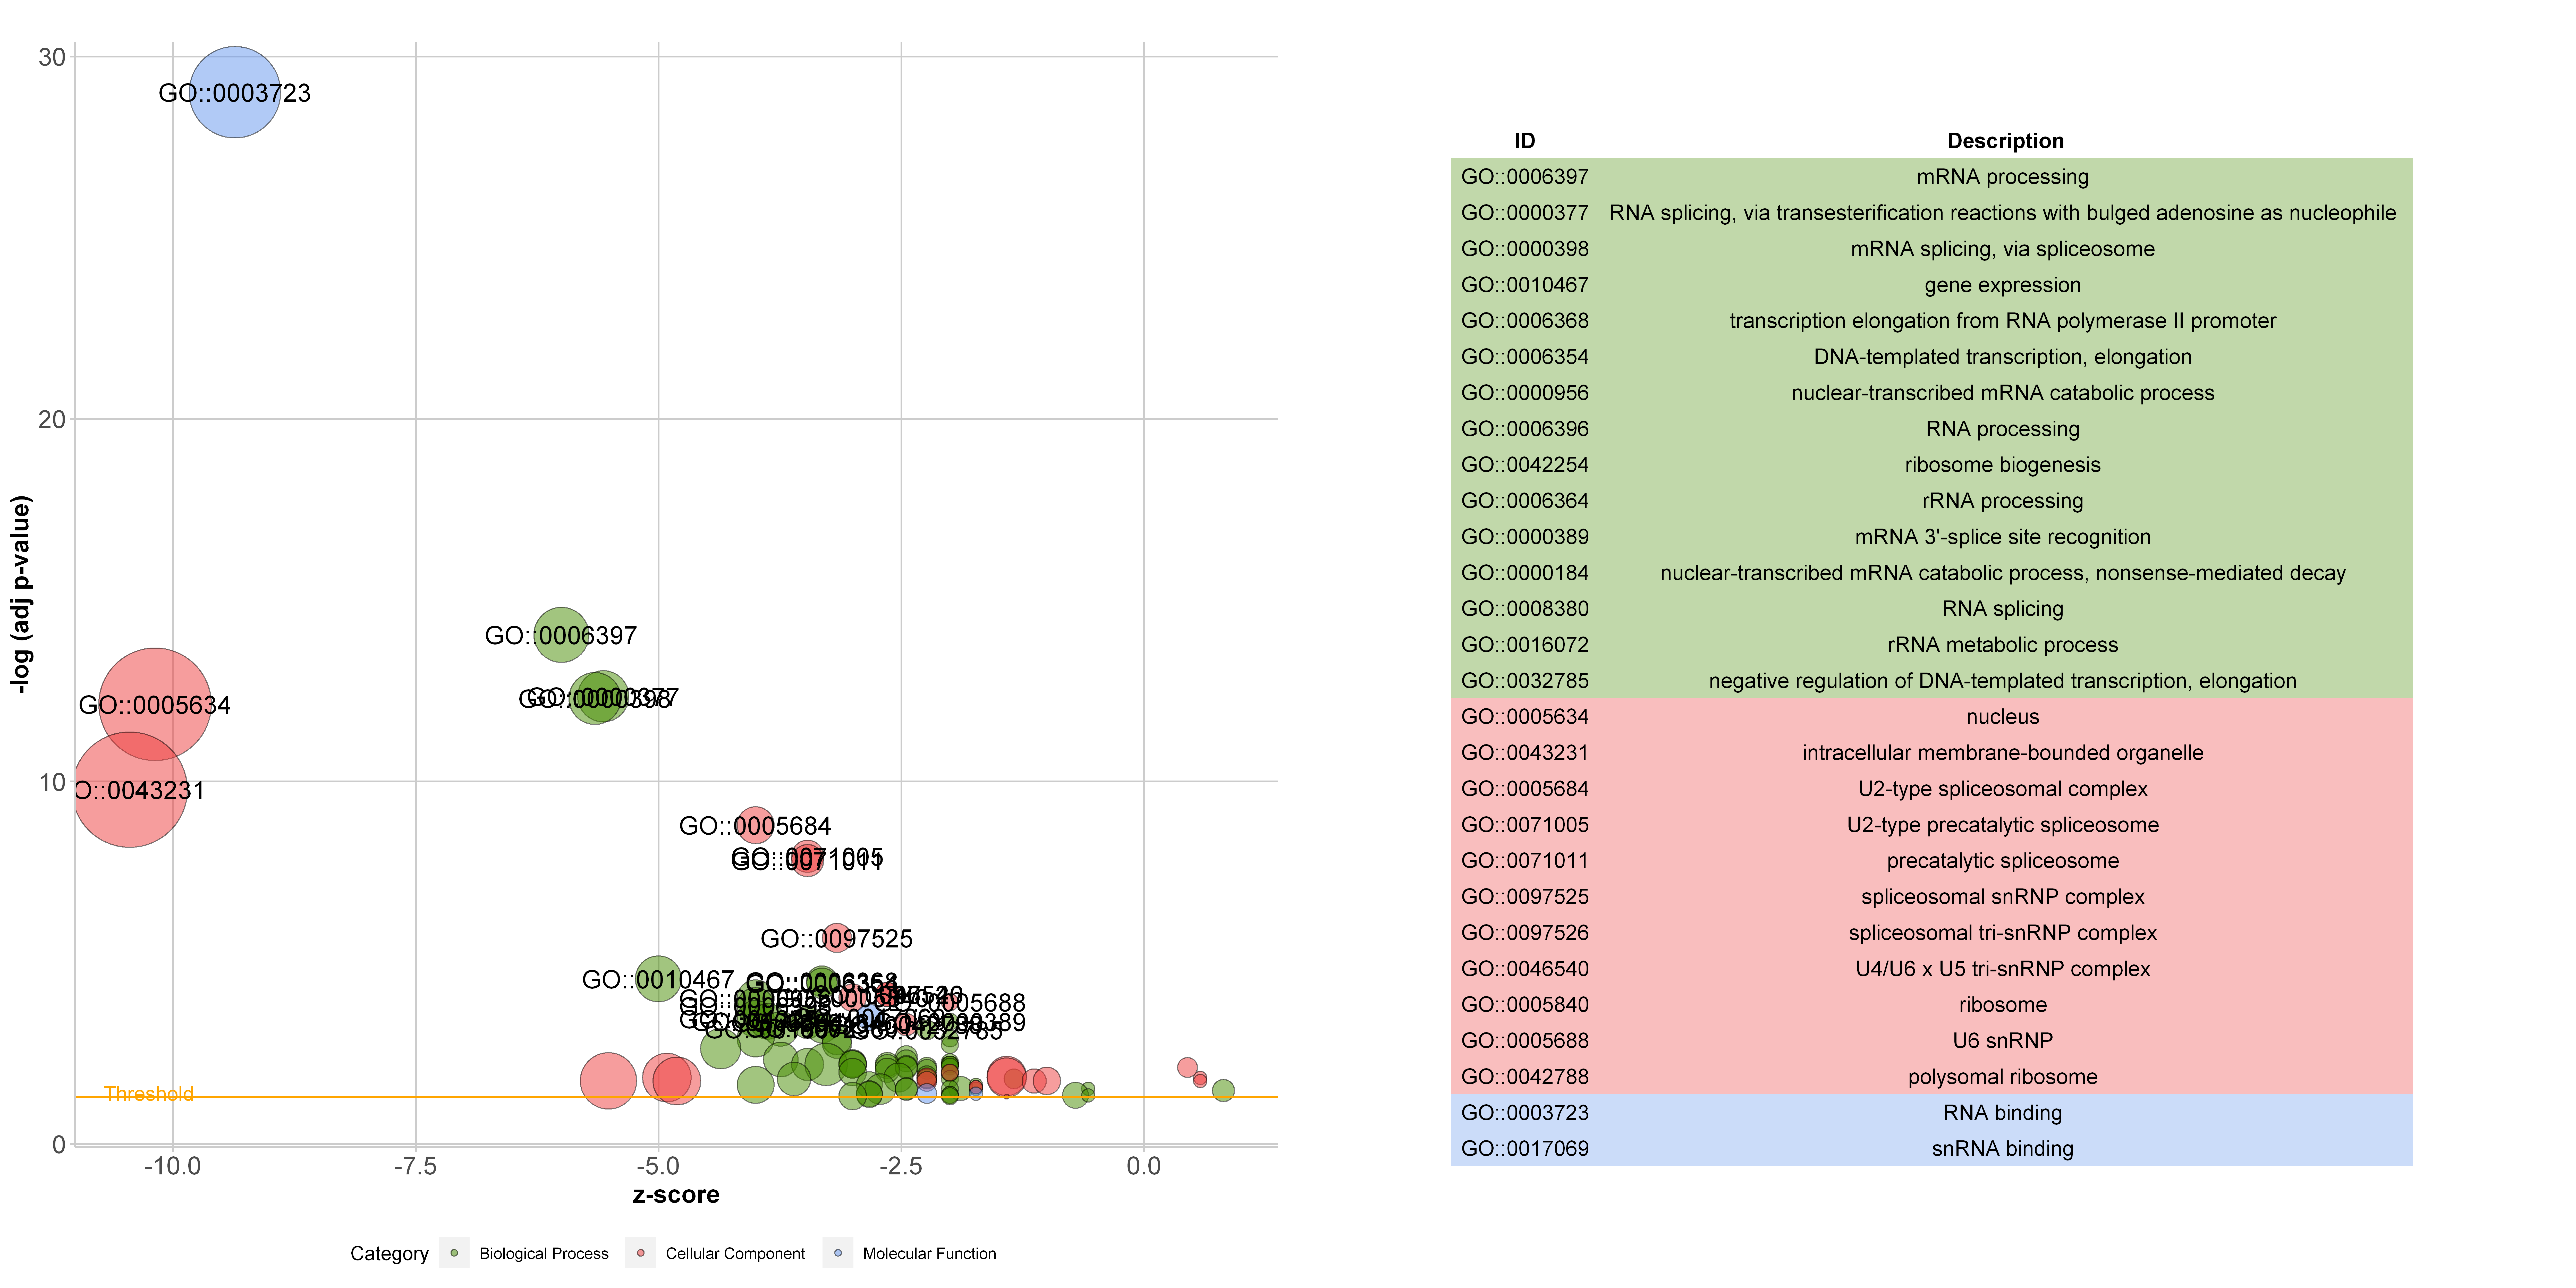

In [9]:
options(repr.plot.width=20, repr.plot.height=10, repr.plot.res = 500)
#GOBubble(circ, title = 'Bubble plot with background colour', display = 'multiple', bg.col = T, labels = 3)

GOBubble(circ, labels = 3)

# Data export

In [10]:
# GO data parsing for export

zscore <- circ %>% select(c("ID","zscore","count")) %>% unique

Sig.GO.all <- GO.all %>% select(c("Category","ID","Term","Overlap","P.value","Adjusted.P.value","Odds.Ratio","Combined.Score","Genes")) %>%
        filter(Adjusted.P.value <= 0.05)

Sig.GO.export <- left_join(Sig.GO.all,zscore,by="ID") %>% select(c("Category","ID","Term","count","Overlap","P.value","Adjusted.P.value","Odds.Ratio","Combined.Score","zscore","Genes"))



# KEGG data parsing for export

KEGG.zscore <- KEGG.circ %>% select(c("term","zscore","count")) %>% unique
colnames(KEGG.zscore) <- c(c("Term","zscore","count"))

sig.KEGG <- KEGG %>% select(c("Category","Term","Overlap","P.value","Adjusted.P.value","Odds.Ratio","Combined.Score","Genes")) %>%
        filter(Adjusted.P.value <= 0.05)
sig.KEGG.export <- left_join(sig.KEGG,KEGG.zscore,by="Term") %>% select(c("Category","Term","count","Overlap","P.value","Adjusted.P.value","Odds.Ratio","Combined.Score","zscore","Genes"))


In [11]:
GO.export <- createWorkbook()


addWorksheet(GO.export,"GeneOntology")
addWorksheet(GO.export,"KEGG_Pathway")

GO.export

writeDataTable(GO.export,"GeneOntology",Sig.GO.export)
writeDataTable(GO.export,"KEGG_Pathway",sig.KEGG.export)


saveWorkbook(GO.export, file = "GO_EnrichR_Results.xlsx")


A Workbook object.
 
Worksheets:
 Sheet 1: "GeneOntology"
 

 Sheet 2: "KEGG_Pathway"
 

 
 Worksheet write order: 1, 2
 Active Sheet 1: "GeneOntology" 
	Position: 1


## Session Info

In [12]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19042)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] openxlsx_4.2.5     GOplot_1.0.2       RColorBrewer_1.1-3 gridExtra_2.3     
 [5] ggdendro_0.1.23    enrichR_3.0        forcats_0.5.1      stringr_1.4.0     
 [9] dplyr_1.0.9        purrr_0.3.4        readr_2.1.2        tidyr_1.2.0       
[13] tibble_3.1.7       ggplot2_3.3.6      tidyverse_1.3.1   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.8.3     lubridate_1.8.0  assertthat_0.2.1 digest_0.6.29   
 [5] utf8_1.2.2       IRdisplay_1.1    R6_2.5.1         cellranger_1.1.0
 [9] repr_1.1.4